# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

The data represents 17 marketing campaigns

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [69]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [7]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

The following fields have "Unknown" values: job, marital, education, default, housing, and loan, which indicates missing values. <br>
<br>
The fields also appear to be in appropriate dtypes given their ranges of possible values. It may be useful to coerce the "yes/no" fields into a Boolean datatype and drop the "Unknown" values; this includes the target variable. <br>
<br>
The categorical fields may be better handled through one-hot encoding or ordinal encoding. <br>
<br>
Fields to be handled with ordinal encoding: education and poutcome. <br>
<br>
Fields to be handled with one-hot encoding: job, marital, default, housing, loan, and contact. <br>
<br>
Through independent research and exploration of online resources, including ChatGPT, I learned about alternate methods of encoding month and weekday information, which preserves the cyclicality of these fields and minimizes the models internalizing misleading correlations that could arise if using one-hot encoding or ordinal encoding. As a result, I think it would be best to implement sin/cos encoding for the month and weekday fields. <br>

ChatGPT. "Discussion on Encoding Month and Weekday for Machine Learning Models." OpenAI, 25 March 2025. <br>

Lewinson, Eryk. "Three Approaches to Encoding Time Information as Features for ML Models." NVIDIA Developer Technical Blog. 17 February 2022. Accessed 25 March 2025, https://developer.nvidia.com/blog/three-approaches-to-encoding-time-information-as-features-for-ml-models/
<br>
<br> Scikit-learn guidance for implementing cyclical feature engineering: <br>
https://scikit-learn.org/stable/auto_examples/applications/plot_cyclical_feature_engineering.html

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

Business Objective: To identify the conditions under which a contact is likely to subscribe. These conditions include: <br>
- Characteristics of the individual, like employment status, marital status, etc <br>
- Characteristics of timing, like month, day of the week <br>
- Characteristics related to previous campaigns, like the outcomes or number of contacts from previous campaigns directed at this customer <br>
- Characteristics of the economy at the time of contact, like CPI. <br>
<br>
This business objective will be addressed by way of building a predictive model that identifies which characteristics or groups of characteristics are most correllated with a successful subscription.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [142]:
#Import StandardScaler, OneHotEncoding, ColumnTransformer from SciKit Learn
#Import Numpy
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, OrdinalEncoder, StandardScaler, FunctionTransformer
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("future.no_silent_downcasting", True)

In [144]:
#Drop the "duration" column, based on the guidance of the field description above.
#Drop rows where any of the values are "Unknown"
df_working = df.drop(columns=['duration']).where(df != 'unknown')
df_working.dropna(inplace=True, ignore_index=True)

#Declare column types and corresponding fields
columns_ordinal = ['education', 'poutcome']
columns_categorical = ['job', 'marital']
columns_binary = ['default', 'housing', 'loan', 'contact']
columns_cyclic = ['month', 'day_of_week']
#Define ordinal column value ranges
ordinal_education = ['basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree']
ordinal_poutcome = ['failure','nonexistent','success']

#Translate month and day of week to numerical values
month_mapper = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}
wkday_mapper = {'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5}

df_working['month'] = df_working['month'].replace(month_mapper).astype(float)
df_working['day_of_week'] = df_working['day_of_week'].replace(wkday_mapper).astype(float)

df_working.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30488 entries, 0 to 30487
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30488 non-null  int64  
 1   job             30488 non-null  object 
 2   marital         30488 non-null  object 
 3   education       30488 non-null  object 
 4   default         30488 non-null  object 
 5   housing         30488 non-null  object 
 6   loan            30488 non-null  object 
 7   contact         30488 non-null  object 
 8   month           30488 non-null  float64
 9   day_of_week     30488 non-null  float64
 10  campaign        30488 non-null  int64  
 11  pdays           30488 non-null  int64  
 12  previous        30488 non-null  int64  
 13  poutcome        30488 non-null  object 
 14  emp.var.rate    30488 non-null  float64
 15  cons.price.idx  30488 non-null  float64
 16  cons.conf.idx   30488 non-null  float64
 17  euribor3m       30488 non-null 

In [146]:
#Define functions for cyclical encoding.
def sin_transformer(period):
    return FunctionTransformer(lambda x: np.sin(x/(2*period*np.pi)))

def cos_transformer(period):
    return FunctionTransformer(lambda x: np.cos(x/(2*period*np.pi)))
#Define Column Transformer
full_transformer = ColumnTransformer(
    transformers=[
        ("ordinal", OrdinalEncoder(categories=[ordinal_education, ordinal_poutcome]), columns_ordinal),
        ("categorical", OneHotEncoder(), columns_categorical),
        ("binary", OneHotEncoder(drop='if_binary'), columns_binary),
        ("month_sin", sin_transformer(12), ['month']),
        ("month_cos", cos_transformer(12), ['month']),
        ("weekday_sin", sin_transformer(7), ['day_of_week']),
        ("weekday_cos", cos_transformer(7), ['day_of_week'])
    ],
    remainder=StandardScaler() #Perform standard scaling for the remaining numerical values
)
df_transformed = full_transformer.fit_transform(df_working.drop(columns=['y']))

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [158]:
features_train, features_test, y_train, y_test = train_test_split(df_working.drop(columns=['y']),
                                                                                         df_working['y'],
                                                                         train_size=0.8)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [160]:
#The model should be more accurate than assuming all contacts will subscribe. 
baseline_performance_y = len(df['y'].loc[df['y'] == 'yes'])/len(df['y'])
baseline_performance_x = 1 - baseline_performance_y
print(np.round(baseline_performance_y,2))
print(np.round(baseline_performance_x,2))

0.11
0.89


We can be 89% accurate simply by guessing that everyone will not convert. Therefore, our classifier should be at least 89-90% accurate.

In [152]:
print(baseline_performance_x)

0.8873458288821987


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [261]:
#Logistic Regression
logistic_pipeline = Pipeline([
    ('transform', full_transformer),
    ('logistic regression', LogisticRegression())
     ])
logistic_model = logistic_pipeline.fit(features_train, y_train)
logistic_model.score(features_test, y_test)

0.8922597572974745

### Problem 9: Score the Model

What is the accuracy of your model?

The Accuracy of the Logistic Regression model is 89%, just barely improving upon the baseline.

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [170]:
from datetime import datetime

In [182]:
model = ['Logistic Regression', 'KNN', 'Decision Tree', 'SVM']
train_time = []
train_accuracy = []
test_accuracy = []

starttime = datetime.now()
#Record Logistic Regression Metrics
logistic_pipeline = Pipeline([
    ('transform', full_transformer),
    ('logistic regression', LogisticRegression())
     ])
logistic_pipeline.fit(features_train, y_train)
endtime = datetime.now()
train_time.append(endtime - starttime)
train_accuracy.append(logistic_pipeline.score(features_train, y_train))
test_accuracy.append(logistic_pipeline.score(features_test, y_test))
endtime = datetime.now()

starttime = datetime.now()
#Record KNN Metrics
knn_pipeline = Pipeline([
    ('transform', full_transformer),
    ('KNN', KNeighborsClassifier())
     ])
knn_pipeline.fit(features_train, y_train)
endtime = datetime.now()
train_time.append(endtime - starttime)
train_accuracy.append(knn_pipeline.score(features_train, y_train))
test_accuracy.append(knn_pipeline.score(features_test, y_test))


In [184]:
#Record Decision Tree Metrics
starttime = datetime.now()
dtree_pipeline = Pipeline([
    ('transform', full_transformer),
    ('Decision_Tree', DecisionTreeClassifier())
     ])
dtree_pipeline.fit(features_train, y_train)
endtime = datetime.now()
train_time.append(endtime - starttime)
train_accuracy.append(dtree_pipeline.score(features_train, y_train))
test_accuracy.append(dtree_pipeline.score(features_test, y_test))


In [186]:
#Record SVM Metrics
starttime = datetime.now()
svm_pipeline = Pipeline([
    ('transform', full_transformer),
    ('svm', SVC())
     ])
svm_pipeline.fit(features_train, y_train)
endtime = datetime.now()
train_time.append(endtime - starttime)
train_accuracy.append(svm_pipeline.score(features_train, y_train))
test_accuracy.append(svm_pipeline.score(features_test, y_test))

In [238]:
df_comparison = pd.DataFrame(data={'Model': model, 'Train Time': train_time, 'Train Accuracy': train_accuracy, 
                                   'Test Accuracy': test_accuracy})

In [240]:
#Comparison Findings
df_comparison['Train Time'] = df_comparison['Train Time'].dt.components['milliseconds']
display(df_comparison)

,Model,Train Time,Train Accuracy,Test Accuracy
0,Logistic Regression,123,0.888028,0.892260
1,KNN,33,0.903362,0.884552
2,Decision Tree,140,0.994301,0.819121
3,SVM,210,0.887372,0.889144


The KNN Classifier was the fastest model to train, at 33 milliseconds. It has an acceptable train accuracy, but the test accuracy is actually lower than the baseline performance standard. The Decision Tree classifier was the second longest model to train (140 milliseconds). It also has a 99% accuracy on the training data and 82% accuracy on the test data. These metrics indicate that the KNN and Decision Tree classifiers are overfit, with the Decision Tree classifier being the most overfit model of the 4. <br>

The Support Vector Classifier model took the longest to train, at 210 milliseconds. The training accuracy is pretty close to the baseline performance standard, and the test accuracy shows slight improvement. This is a promising sign that this model is not terribly overfit. <br>

Of the 4 models, the Logistic Regression model is the best model to run on default settings. It is the second fastest model to train, and the test accuracy is better than the train accuracy, both of which are better than the baseline performance metric. Even though both accuracy scores are better than the baseline performance metric, there is no obvious sign that the model is overfit, based on the accuracy scored on the training set. 

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

Based purely on ethical concerns, I think we should not include the gender feature. It risks ingraining systematic prejudices in a model, and if that model were applied in a real business setting, this risks propagating or further solidifying systematic gender-based inequality in that business's practices. Furthermore, social conception of gender is still a dynamic dimension of sociopolitics, and it is imprudent to integrate, as a variable, a label that is an unresolved social and equity minefield. <br>
<br>
I'm going to focus on hyperparameter exploration for the different models, but some additional features that would be interesting to explore include:<br>
- Polynomial terms of the numeric features <br>
- Combinations of Month and Weekday <br>

Running PCA would also be interesting to explore, since there are so many dimensions in the data that I'd want to prune features that are correlated with each other. I'd also want to reduce the likelihood of overfitting resulting from noise arising from the combination of so many different dimensions.

In [265]:
from sklearn.metrics import ConfusionMatrixDisplay

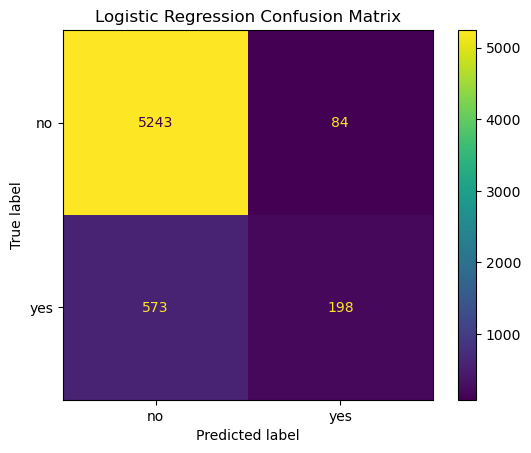

In [283]:
#Logistic Regression Confusion Matrix
ConfusionMatrixDisplay.from_estimator(logistic_pipeline, features_test, y_test)
plt.title("Logistic Regression Confusion Matrix")
plt.show()

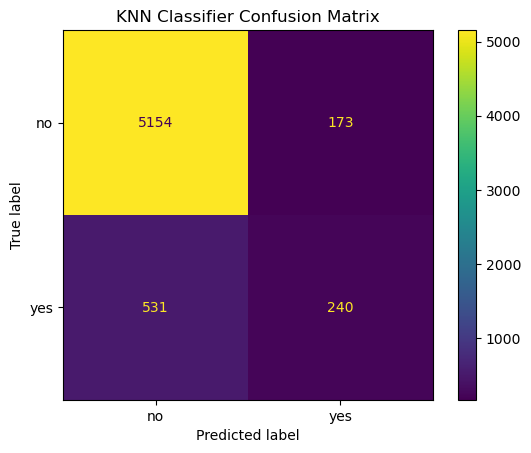

In [285]:
#KNN Confusion Matrix
ConfusionMatrixDisplay.from_estimator(knn_pipeline, features_test, y_test)
plt.title("KNN Classifier Confusion Matrix")
plt.show()

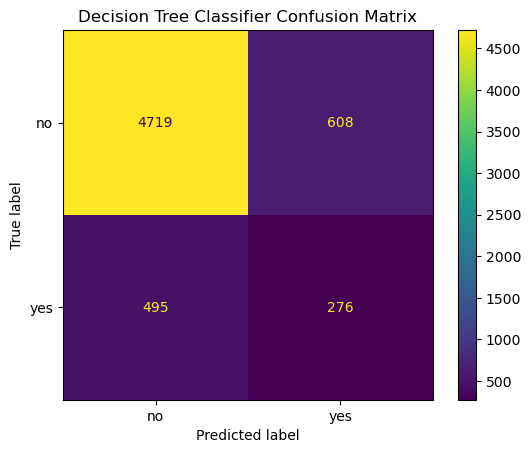

In [287]:
#Decision Tree Confusion Matrix
ConfusionMatrixDisplay.from_estimator(dtree_pipeline, features_test, y_test)
plt.title("Decision Tree Classifier Confusion Matrix")
plt.show()

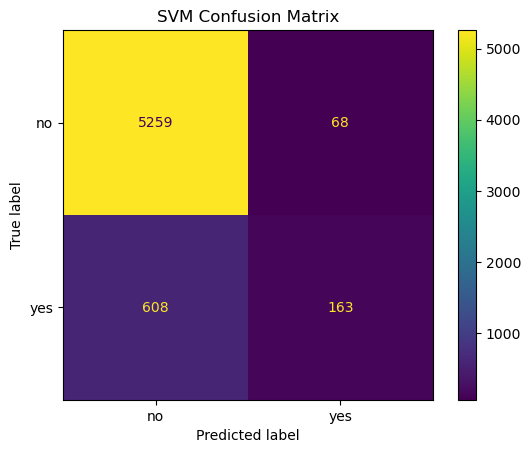

In [289]:
#SVM Confusion Matrix
ConfusionMatrixDisplay.from_estimator(svm_pipeline, features_test, y_test)
plt.title("SVM Confusion Matrix")
plt.show()

##### Questions